In [197]:
#Basic imports

import numpy as np
from numpy import array, sqrt, sum, repeat, zeros, newaxis, copy, pi, arange, linspace, clip, real, abs, ones, exp, argwhere, arctan
import matplotlib.pyplot as plt
plt.style.use('default')
from scipy import special

uM = 1e-6 #micro metre
nM = 1e-9 #nano metre
epsilon = 1*uM
LAMDA = 532*nM
W0 = 5*uM
Z_R = pi*1*(W0**2)/LAMDA
K0 = 2*pi/LAMDA


In [182]:
# Test plane
plane = array([[[-1, 1, 0], [1, 1, 0]], [[-1, -1, 0], [1, -1, 0]]])
print(plane)
print(plane.shape)
print(plane[0][0])
print(plane**2)
plane_sq = plane**2
sqrt(sum(plane_sq, axis=2))

[[[-1  1  0]
  [ 1  1  0]]

 [[-1 -1  0]
  [ 1 -1  0]]]
(2, 2, 3)
[-1  1  0]
[[[1 1 0]
  [1 1 0]]

 [[1 1 0]
  [1 1 0]]]


array([[1.41421356, 1.41421356],
       [1.41421356, 1.41421356]])

In [183]:
def radial_distance(plane_array_in):
    return sqrt(sum(plane_array_in**2, axis=2))

print(radial_distance(plane))
N = 1000
X = linspace(-50, 50, N)
Y = linspace(-50, 50, N)
Z = zeros(X.shape)
GLOBAL_EXTENT = [X[0], X[-1], Y[0], Y[-1]]

# Delta arrays for gradient
DX = []
DY = []
DZ = []
Delta_step = 1/N
# Z = zeros(n)
input_plane = []
for x in X:
    x_y = []
    DX_y = []
    DY_y = []
    DZ_y = []
    for y in Y:
        x_y_z = [x, y, 0]
        x_y.append(x_y_z)
        DX_y.append([Delta_step, 0, 0])
        DY_y.append([0, Delta_step, 0])
        DZ_y.append([0, 0, Delta_step])
    input_plane.append(x_y)
    DX.append(DX_y)
    DY.append(DY_y)
    DZ.append(DZ_y) 
input_plane = array(input_plane)
DX = array(DX)
DY = array(DY)
DZ = array(DZ)
# print(input_plane)


[[1.41421356 1.41421356]
 [1.41421356 1.41421356]]


[[70.71067812 70.63993212 70.56925719 ... 70.56925719 70.63993212
  70.71067812]
 [70.63993212 70.5691152  70.49836927 ... 70.49836927 70.5691152
  70.63993212]
 [70.56925719 70.49836927 70.42755228 ... 70.42755228 70.49836927
  70.56925719]
 ...
 [70.56925719 70.49836927 70.42755228 ... 70.42755228 70.49836927
  70.56925719]
 [70.63993212 70.5691152  70.49836927 ... 70.49836927 70.5691152
  70.63993212]
 [70.71067812 70.63993212 70.56925719 ... 70.56925719 70.63993212
  70.71067812]]


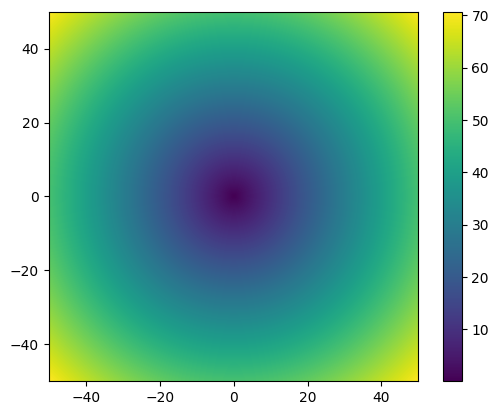

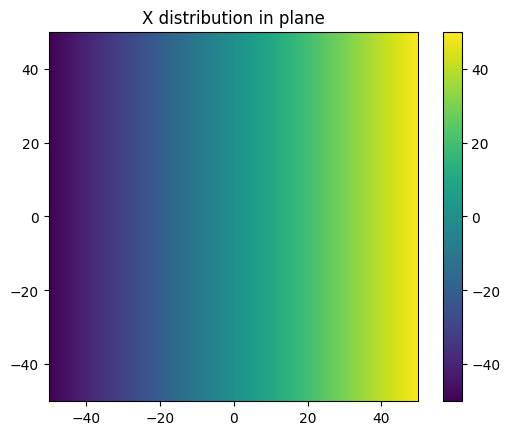

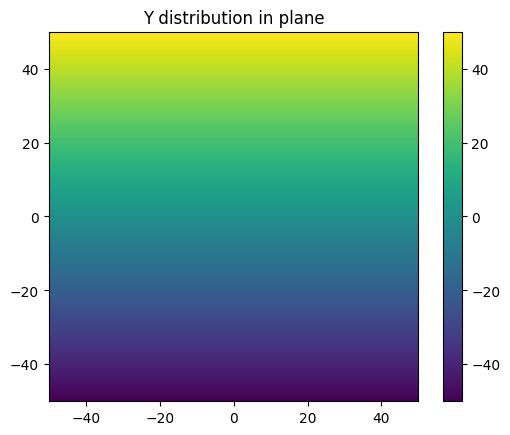

In [184]:
r_input =  radial_distance(input_plane)
print(r_input)
plt.imshow(r_input, extent=GLOBAL_EXTENT)
plt.colorbar()

plt.figure()
plt.title("X distribution in plane")
plt.imshow(input_plane[:, :, 0].T, extent=GLOBAL_EXTENT, origin='lower')
plt.colorbar()

plt.figure()
plt.title("Y distribution in plane")
plt.imshow(input_plane[:, :, 1].T, extent=GLOBAL_EXTENT, origin='lower')
plt.colorbar()

# print(5*sqrt(2))

In [185]:
def get_vector(scalar):
    return array([1*scalar, 2*scalar, 3*scalar]).T
plane_radius = radial_distance(plane)
print(plane)
print(plane.shape)
print(plane_radius)
print(plane_radius.shape)
print((get_vector(plane_radius)).shape)
print(get_vector(plane_radius)**2)
get_vector(array([1]))

[[[-1  1  0]
  [ 1  1  0]]

 [[-1 -1  0]
  [ 1 -1  0]]]
(2, 2, 3)
[[1.41421356 1.41421356]
 [1.41421356 1.41421356]]
(2, 2)
(2, 2, 3)
[[[ 2.  8. 18.]
  [ 2.  8. 18.]]

 [[ 2.  8. 18.]
  [ 2.  8. 18.]]]


array([[1, 2, 3]])

In [186]:
def get_gradient(scalar_function, location):
    dx_plane = array([[[1, 0, 0]], [[1, 0, 0]]])
    dy_plane = array([[[0, 1, 0]], [[0, 1, 0]]])
    dz_plane = array([[[0, 0, 1]], [[0, 0, 1]]])
    grad_x = scalar_function()

    pass


dx_plane = array([[[1, 0, 0]], [[1, 0, 0]]])
dy_plane = array([[[0, 1, 0]], [[0, 1, 0]]])
dz_plane = array([[[0, 0, 1]], [[0, 0, 1]]])


print(plane)
print(radial_distance(plane + dx_plane) - radial_distance(plane))
print(plane + dx_plane)
print(radial_distance(plane+dx_plane))
print(radial_distance(plane))
print(sqrt(5) - sqrt(2))

[[[-1  1  0]
  [ 1  1  0]]

 [[-1 -1  0]
  [ 1 -1  0]]]
[[-0.41421356  0.82185442]
 [-0.41421356  0.82185442]]
[[[ 0  1  0]
  [ 2  1  0]]

 [[ 0 -1  0]
  [ 2 -1  0]]]
[[1.         2.23606798]
 [1.         2.23606798]]
[[1.41421356 1.41421356]
 [1.41421356 1.41421356]]
0.8218544151266947


(1000, 1000, 3)
[[-1.00000000e+02 -9.98998999e+01 -9.97997998e+01 ... -2.00200200e-01
  -1.00100100e-01  0.00000000e+00]
 [-9.98998999e+01 -9.97997998e+01 -9.96996997e+01 ... -1.00100100e-01
   7.10542736e-15  1.00100100e-01]
 [-9.97997998e+01 -9.96996997e+01 -9.95995996e+01 ...  0.00000000e+00
   1.00100100e-01  2.00200200e-01]
 ...
 [-2.00200200e-01 -1.00100100e-01  0.00000000e+00 ...  9.95995996e+01
   9.96996997e+01  9.97997998e+01]
 [-1.00100100e-01  7.10542736e-15  1.00100100e-01 ...  9.96996997e+01
   9.97997998e+01  9.98998999e+01]
 [ 0.00000000e+00  1.00100100e-01  2.00200200e-01 ...  9.97997998e+01
   9.98998999e+01  1.00000000e+02]]
[-50. -50.   0.]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


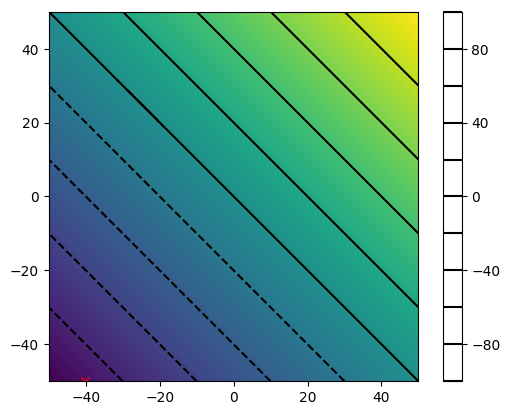

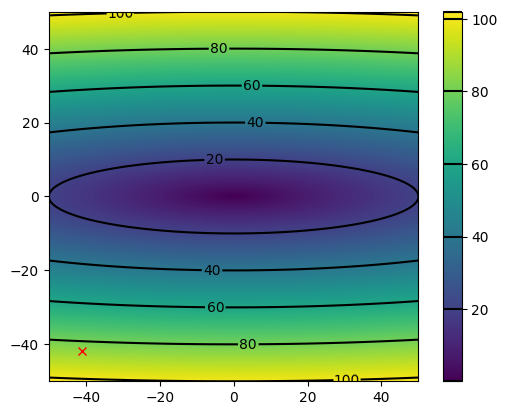

In [187]:
angled_plane = []
for x in X:
    x_y = []
    DX_y = []
    DY_y = []
    DZ_y = []
    for y in Y:
        x_y_z = [x, y, x+y]
        x_y.append(x_y_z)
    angled_plane.append(x_y)
angled_plane = array(angled_plane)

def get_angled_plane(plane_array_in):
    plane_array_in[:, :, 2] = sqrt(((0.4*plane_array_in[:, :, 0].T)**2 + (2*plane_array_in[:, :, 1].T)**2).T)
    return plane_array_in

input_plane_copy = copy(input_plane)
angled_plane_from_function = get_angled_plane(input_plane_copy)
print(angled_plane.shape)
# print(angled_plane_from_function.shape)
print((angled_plane[:, : , 2]))
plt.figure()
plt.imshow(angled_plane[:, :, 2].T, extent=GLOBAL_EXTENT, origin="lower")
plt.contour(input_plane[:, :, 0], input_plane[:, :, 1], angled_plane[:, :, 2], 10, colors='black')
plt.plot(input_plane[99, 0, 0], input_plane[0, 0, 1], 'rx')
plt.colorbar()

plt.figure()
im = plt.imshow(angled_plane_from_function[:, :, 2].T, extent=GLOBAL_EXTENT, origin="lower")
plt.plot(input_plane[89, 0, 0], input_plane[0, 83, 1], 'rx')
ctr = plt.contour(input_plane[:, :, 0], input_plane[:, :, 1], angled_plane_from_function[:, :, 2], 5, colors='black')
plt.clabel(ctr, inline=1, fontsize=10)
cbr = plt.colorbar(im)
cbr.add_lines(ctr)

print(input_plane[0, 0])
print(input_plane[:, :, 2].T)
# print(angled_plane)
# print(input_plane[:, :, 1])
# print(input_plane[0, 0])
# print(input_plane)
# print(get_vector(angled_plane[:, :, 0]).shape)

In [208]:
def get_radial_distance(plane_array_in):
    x = plane_array_in[:,:, 0].T
    y = plane_array_in[:,:, 1].T
    r = sqrt(x**2 + y**2)
    return r.T

def do_dot_product(plane_one, plane_two):
    x1, y1, z1 = plane_one[:,:,0].T, plane_one[:,:,1].T, plane_one[:,:,2].T
    x2, y2, z2 = plane_two[:,:,0].T, plane_two[:,:,1].T, plane_two[:,:,2].T
    dot_x = x1*x2
    dot_y = y1*y2
    dot_z = z1*z2
    return (dot_x + dot_y + dot_z).T    


def get_magnitude(plane_array_in):
    x = plane_array_in[:,:, 0].T
    y = plane_array_in[:,:, 1].T
    z = plane_array_in[:,:, 2].T
    r = sqrt(x**2 + y**2 + z**2)
    return r.T

def get_beam_width(plane_array_in, w0, zR):
    z = plane_array_in[:, :, 2]
    return (w0*sqrt(1 + (z/zR)**2))

def get_wavefront_curvature(plane_array_in, zR):
    z = plane_array_in[:, :, 2]
    return z*(1 + (zR/z)**2)

def get_gouy_phase(plane_array_in, zR):
    z = plane_array_in[:, :, 2]
    return arctan(z/zR)

def Hermite_n(x, n=0):
    ''' 
    x-> input variables
    n-> order of Hermite Polynomial (default = 0)
    '''
    h_n = special.hermite(n, monic=False)
    return h_n(x)

def get_refractive_index(plane_array_in, n0=1.3, A=sqrt(184615384.61538467)):
    # x = plane_array_in[:,:,0].T
    # y = plane_array_in[:,:,1].T
    # z = plane_array_in[:,:,2].T
    # r = sqrt(x**2 + y**2)
    # n = n0*(1 - 0.5*((A*r)**2))
    # return n.T

    r = get_radial_distance(plane_array_in)
    return n0*(1 - 0.5*(A*r)**2)

def plot_vector(vector_array_in, vector_name, lims = (-50, 50), cmap = 'viridis'):
    plt.figure()
    plt.title(f'{vector_name} in x')
    plt.imshow(vector_array_in[:, :, 0].T, extent=GLOBAL_EXTENT, origin='lower', cmap=cmap)
    plt.xlim(lims)
    plt.ylim(lims)
    plt.colorbar()

    plt.figure()
    plt.title(f'{vector_name} in y')
    plt.imshow(vector_array_in[:, :, 1].T, extent=GLOBAL_EXTENT, origin='lower', cmap=cmap)
    plt.xlim(lims)
    plt.ylim(lims)  
    plt.colorbar()

    plt.figure()
    plt.title(f'{vector_name} in z')
    plt.imshow(vector_array_in[:, :, 2].T, extent=GLOBAL_EXTENT, origin='lower', cmap=cmap)
    plt.xlim(lims)
    plt.ylim(lims)  
    plt.colorbar()

    plt.figure()
    plt.title(f"magnitude (|{vector_name}|)")
    plt.imshow(get_magnitude(vector_array_in).T, extent=GLOBAL_EXTENT, origin='lower',cmap=cmap )
    plt.xlim(lims)
    plt.ylim(lims)  
    plt.colorbar()
    plt.show()


In [189]:
# Hermite_n(input_plane[:,:, 0], 3)
# get_magnitude(input_plane)

(1000, 1000)
1.2999993987981977 1.0


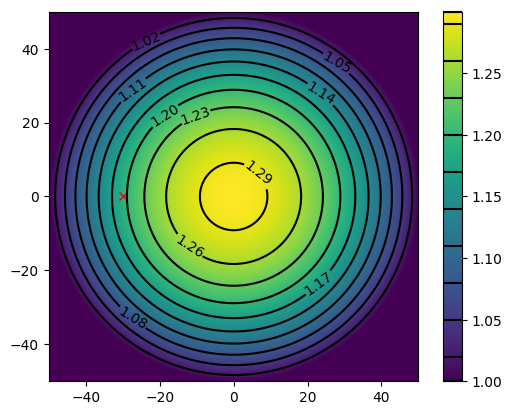

In [190]:


n_grin = get_refractive_index(input_plane*1e-6)
n_grin = clip(n_grin, 1, 1.607)
print(n_grin.shape)
print(n_grin.max(), n_grin.min())
plt.figure()
im = plt.imshow(n_grin.T, extent=GLOBAL_EXTENT, origin='lower')
plt.plot(input_plane[200, 0, 0], input_plane[0, 500, 1], 'rx')
ctr = plt.contour(input_plane[:,:, 0], input_plane[:, :, 1], n_grin, 10, colors='black')
plt.clabel(ctr, inline='1')
cbr = plt.colorbar(im)
cbr.add_lines(ctr)

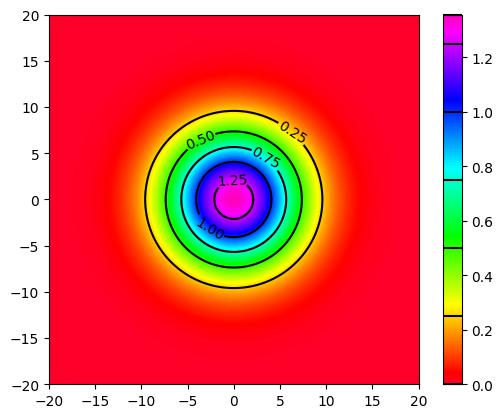

In [191]:
def vectorized_gaussian_beam(plane_array_in, E_0_i=2, mode=(0, 0), refractive_index=1, l0 = LAMDA, w0 = W0):
    l, m = mode
    x = plane_array_in[:,:,0].T
    y = plane_array_in[:,:,1].T
    zR = (pi*refractive_index*w0**2)/l0
    r = get_radial_distance(plane_array_in).T
    w = get_beam_width(plane_array_in, w0=w0, zR=zR).T
    hx = Hermite_n(sqrt(2)*x/w, l)
    hy = Hermite_n(sqrt(2)*y/w, m)
    return (E_0_i*hx*hy*(w0/w)*exp(-(r/(1*w))**2)).T

def vectorized_psi(plane_array_in):
    x = plane_array_in[:, :, 0].T
    y = plane_array_in[:, :, 1].T
    z = plane_array_in[:, :, 2].T
    r_sq = x**2 + y**2
    R = get_wavefront_curvature(plane_array_in, zR=Z_R)
    return (K0*z + K0*(r_sq/(2*R)) - get_gouy_phase(plane_array_in, zR=Z_R)).T

def vectorized_k(plane_array_in):
    n = get_refractive_index(plane_array_in).T
    R = get_wavefront_curvature(plane_array_in, zR=Z_R).T
    x = plane_array_in[:,:,0].T
    y = plane_array_in[:,:,1].T
    z = plane_array_in[:,:,2].T
    kx = K0*x/R
    ky = K0*y/R
    kz = sqrt((K0*n)**2 - kx**2 - ky**2)
    return array([kx, ky, kz]).T

def vectorized_s_hat(plane_array_in):
    k_vec = vectorized_k(plane_array_in)
    
    k_vec_x = k_vec[:,:,0].T
    k_vec_y = k_vec[:,:,1].T
    k_vec_z = k_vec[:,:,2].T
    k_mag = get_magnitude(k_vec).T  

    s_hat_x = k_vec_x/k_mag
    s_hat_y = k_vec_y/k_mag
    s_hat_z = k_vec_z/k_mag
    return array([s_hat_x, s_hat_y, s_hat_z]).T

def vectorized_T(plane_array_in):
    
    n = get_refractive_index(plane_array_in).T
    s_hat = vectorized_s_hat(plane_array_in).T
    return (n*s_hat).T

def gradient_index(plane_array_in, n0=1.3, A=sqrt(184615384.61538467)):
    x = plane_array_in[:,:,0].T
    y = plane_array_in[:,:,1].T
    z = (plane_array_in[:,:,2]*0).T
    o = ones(z.shape)
    r = sqrt(x**2 + y**2) 
    a = argwhere(r >= 50*uM)
    o[a[:, 0], a[:, 1]] = 0
    return -(n0*(A**2)*array([x, y, z])*o).T
    
medium_in_plane = copy(input_plane*uM)
medium_in_plane[:,:, 2] = (160*uM*ones(medium_in_plane[:, :, 2].shape)).T

gauss_field = vectorized_gaussian_beam(medium_in_plane, mode=(0,0))

plt.figure()
im = plt.imshow(gauss_field.T, extent=GLOBAL_EXTENT, cmap='gist_rainbow', origin='lower')
plt.xlim(-20, 20)
plt.ylim(-20, 20)
ctr = plt.contour(input_plane[:,:, 0], input_plane[:, :, 1], gauss_field, 5, colors='black')
plt.clabel(ctr, inline='1')
cbr = plt.colorbar(im)
cbr.add_lines(ctr)


(1000, 1000, 3)
[-0. -0. -0.]
[ 40.09009009  40.09009009 160.        ]


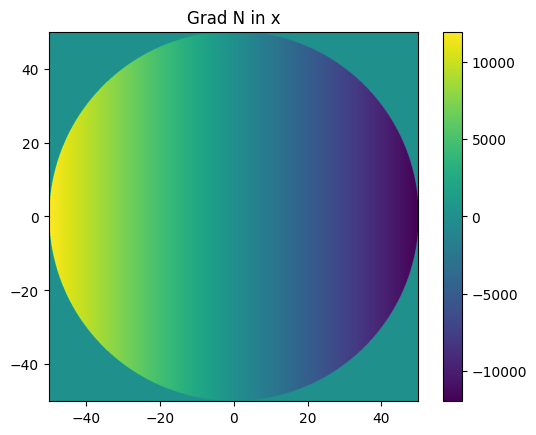

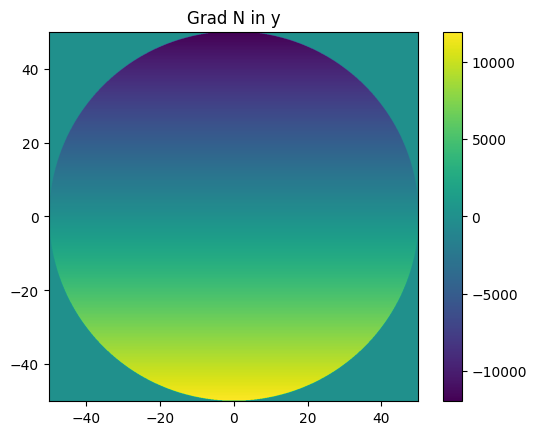

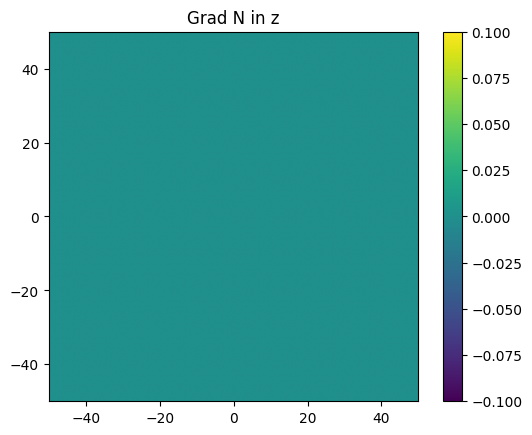

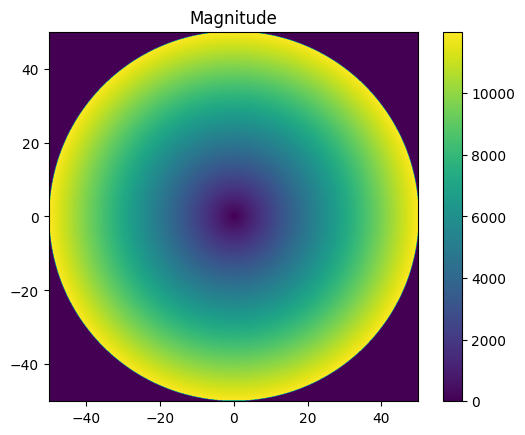

In [216]:
grad_n = gradient_index(medium_in_plane)
# grad_n[argwhere(n_grin == 1)] = 0
medium_in_plane*1e6 
print(grad_n.shape)
test_index = (900, 900)
print(grad_n[test_index])
print(medium_in_plane[test_index]*1e6)

plt.figure()
plt.title('Grad N in x')
plt.imshow(grad_n[:, :, 0].T, extent=GLOBAL_EXTENT, origin='lower')
plt.colorbar()

plt.figure()
plt.title('Grad N in y')
plt.imshow(grad_n[:, :, 1].T, extent=GLOBAL_EXTENT, origin='lower')
plt.colorbar()

plt.figure()
plt.title('Grad N in z')
plt.imshow(grad_n[:, :, 2].T, extent=GLOBAL_EXTENT, origin='lower')
plt.colorbar()

plt.figure()
plt.title("Magnitude")
plt.imshow(get_magnitude(grad_n).T, extent=GLOBAL_EXTENT, origin='lower' )
plt.colorbar()


In [193]:


# test_input_plane = array([[[1,2,3], [3, 4, 6]], [[2,5,8], [9, 10, 11]]])
# test_plane_2 = array([[[21,22,23], [23, 42, 26]], [[22,25,28], [29, 20, 21]]])

# print('A',test_input_plane)
# print('B', test_plane_2)
# print('= (A+B)')
# print(test_plane_2+test_input_plane)

# print("Dot Product A.B")
# # print(dot(test_input_plane, test_plane_2, axis))
# print(do_dot_product(test_input_plane, test_plane_2))
# t_x = test_input_plane[:, :, 0].T
# t_y = test_input_plane[:, :, 1].T
# t_x2 = test_plane_2[:,:,0].T
# t_s = t_x + t_y
# print(t_x)
# print(t_y)
# # print((test_input_plane)/t_x)
# print(test_input_plane[:,:,0].T/t_s)
# print(argwhere(t_s==7))
# print(argwhere(t_s==7)[:, 0])
# test_input_plane[argwhere(t_s == 7)[:, 0], argwhere(t_s == 7)[:, 1]] = 0
# test_input_plane
# test_input_plane[:, :, 2]
# print(test_input_plane[1,0])

# print(argwhere(test_input_plane[:,:, 2] > 7))

In [194]:
test_input_plane = array([[[1,2,3], [3, 4, 6]], [[2,5,8], [9, 10, 11]]])
t_x = array([[1, 2],[3, 4]])

# Reshape t_x to match the shape of test_input_plane
t_x_reshaped = repeat(1/t_x[:, :, newaxis], test_input_plane.shape[2], axis=2)

t_x_test = repeat(t_x[:,:, newaxis], 3, axis=2)
print(t_x_test)
print(t_x_reshaped)
# Perform element-wise multiplication
result = t_x_reshaped * test_input_plane

print(result)

[[[1 1 1]
  [2 2 2]]

 [[3 3 3]
  [4 4 4]]]
[[[1.         1.         1.        ]
  [0.5        0.5        0.5       ]]

 [[0.33333333 0.33333333 0.33333333]
  [0.25       0.25       0.25      ]]]
[[[1.         2.         3.        ]
  [1.5        2.         3.        ]]

 [[0.66666667 1.66666667 2.66666667]
  [2.25       2.5        2.75      ]]]


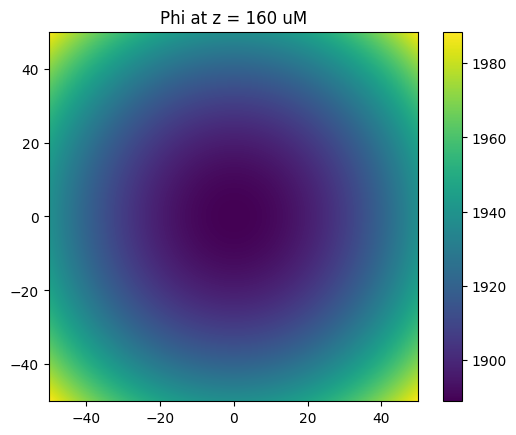

In [209]:
psi_in = vectorized_psi(medium_in_plane)
plt.figure()
plt.title('Phi at z = 160 uM')
plt.imshow(psi_in.T, origin='lower', extent=GLOBAL_EXTENT)
plt.colorbar()


(1000, 1000, 3)


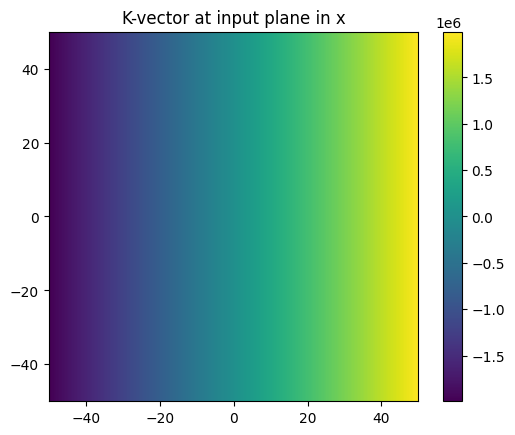

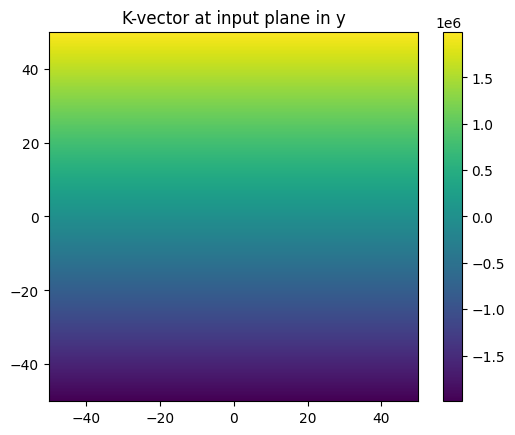

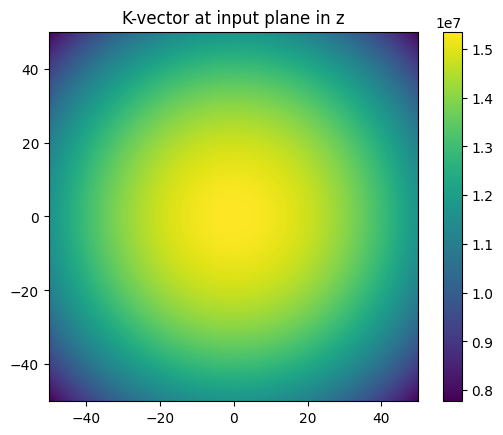

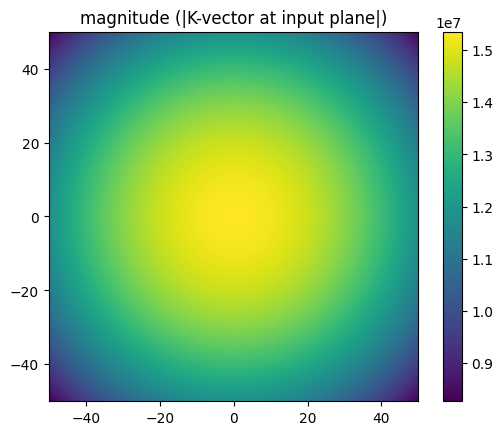

In [210]:
k_in = vectorized_k(medium_in_plane)
print(k_in.shape)
plot_vector(k_in, "K-vector at input plane")


(1000, 1000, 3)
[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]


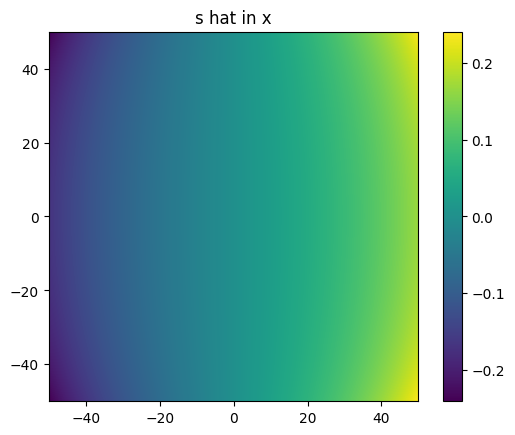

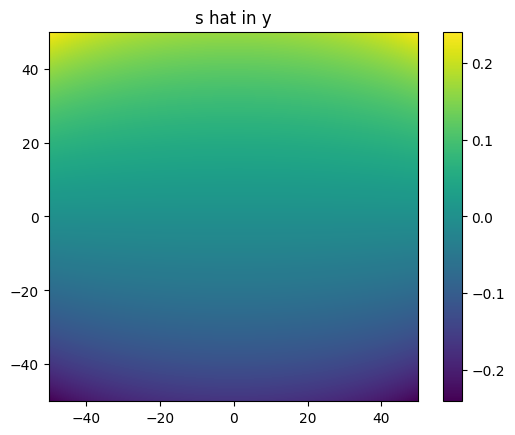

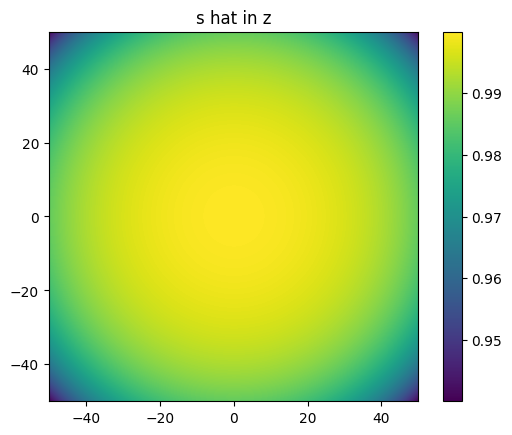

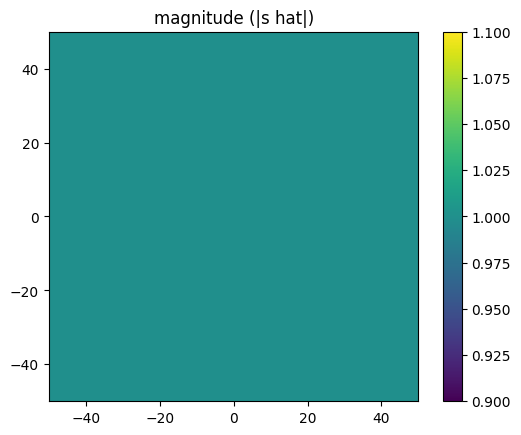

1.0000000000000002
0.9999999999999998


In [211]:
test_s_hat = vectorized_s_hat(medium_in_plane)
mag_test_s_hat = get_magnitude(test_s_hat)
print(test_s_hat.shape)
print(mag_test_s_hat)
plot_vector(test_s_hat, 's hat')
print(mag_test_s_hat.max())
print(mag_test_s_hat.min())

In [201]:
u = zeros(input_plane.shape)
u[:,:,1] = 1
u[:,:,2]

# print(repeat(get_refractive_index(medium_in_plane)[:,:,newaxis], 3, axis=2))

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [236]:
def step(plane_array_in, D_in, T_in, delta=epsilon):
    n = get_refractive_index(plane_array_in)
    n_e = repeat(n[:, :, newaxis], 3, axis=2)
    DdotT = repeat(do_dot_product(D_in, T_in)[:,:, newaxis], 3, axis=2)

    r_d = plane_array_in + (T_in/n_e)*(delta/4) + ((delta**2)/32)*((D_in/n_e) - T_in*(DdotT/n_e**3))
    r_p = plane_array_in + (T_in/n_e)*(delta/2) + ((delta**2)/8)*((D_in/n_e) - T_in*(DdotT/n_e**3))
    # D_p = gradient_index(r_p)
    # T_p = T_in + (delta/12)*(D_in + 4*gradient_index(r_d) + D_p)
    return r_d, r_p # D_p, T_p
    
    # rx, ry, rz = plane_array_in[:,:,0].T,plane_array_in[:,:,1].T,plane_array_in[:,:,2].T
    # T_x, T_y, T_z = T_in[:,:, 0].T, T_in[:,:,1].T, T_in[:,:,2].T
    # r_d_x = rx + (T_x/n)*(delta/2) + ((delta**2)/32)*(D)

def scalar_factor(plane_array_in):
    x = plane_array_in[:,:,0].T
    y = plane_array_in[:,:,1].T
    z = plane_array_in[:,:,2].T
    r = sqrt(x**2 + y**2)
    f = 1 - 0.01*(r-5*uM)/(5*uM)
    a = argwhere(r < 5*uM)
    f[a[:, 0], a[:,1]] = 1
    return f.T

def vectorized_propagate(plane_array_in, z_out = 260*uM, delta_s = epsilon):
    z_0 = plane_array_in[0,0,2]
    E_in = vectorized_gaussian_beam(plane_array_in)
    d_in = gradient_index(plane_array_in)
    t_in = vectorized_T(plane_array_in)
    psi_in = vectorized_psi(plane_array_in)
    T_in = copy(t_in)
    n_i = get_refractive_index(plane_array_in)
    u_hat_in = zeros(plane_array_in.shape)
    u_hat_in[:,:,1] = 1
    a_hat_in = zeros(plane_array_in.shape)
    a_hat_in[:,:,2] = 1
    a_hat_out = zeros(plane_array_in.shape)
    a_hat_out[:,:,2] = 1
    print(medium_in_plane[0,0, 2])
    c = 0
    while z_0 <= z_out:

        #r_i to r_prime
        t_in_copy = copy(t_in)
        r_double_prime, r_prime = step(plane_array_in, d_in, t_in, delta = delta_s)
        D_i, D_d_prime, D_prime = gradient_index(plane_array_in), gradient_index(r_double_prime), gradient_index(r_prime)
        T_prime = t_in + (delta_s/12)*(d_in + 4*D_d_prime + D_prime)
        # D_prime = gradient_index(r_prime)
        n_prime = get_refractive_index(r_prime)
        psi_in = psi_in + (K0*delta_s/4)*(n_i + 2*n_prime)
        f1 = -repeat((do_dot_product(u_hat_in, d_in)/n_i**2)[:,:, newaxis], 3, axis=2)*t_in
        f2 = -repeat((do_dot_product((u_hat_in + delta_s*f1/2), D_prime)/n_prime**2)[:,:, newaxis], 3,axis=2)*T_prime
        f3 = -repeat((do_dot_product((u_hat_in + delta_s*f2/2), D_prime)/n_prime**2)[:,:, newaxis], 3,axis=2)*T_prime
        
        # r_prime to r_i+1
        r_double_prime, plane_array_in = step(r_prime, D_prime, T_prime, delta = delta_s)
        d_in = gradient_index(plane_array_in)
        t_in = T_prime + (delta_s/12)*(gradient_index(r_prime) + 4*gradient_index(r_double_prime) + gradient_index(plane_array_in))
        n_i = get_refractive_index(plane_array_in)
        f4 = -repeat((do_dot_product((u_hat_in + delta_s*f3), d_in)/n_i**2)[:,:, newaxis], 3,axis=2)*t_in
        u_hat_in = u_hat_in + (delta_s/6)*(f1 + 2*f2 + 2*f3 + f4)
        psi_in = psi_in + (K0*delta_s/4)*get_refractive_index(plane_array_in)
        z_0 = plane_array_in[0,0,2]
        f_sc = scalar_factor(plane_array_in)
        E_in = f_sc*E_in*sqrt(5*do_dot_product(t_in_copy, a_hat_in)/do_dot_product(t_in, a_hat_out))
        # c += 1
        print(plane_array_in[0, 0, 2]*1e6)        
    # E_out = E_in*sqrt(5*do_dot_product(T_in, a_hat_in)/do_dot_product(t_in, a_hat_out))
    E_out = E_in
    E_final = repeat((E_out*exp(1j*psi_in))[:,:,newaxis], 3, axis=2)*u_hat_in
    # return z_0, u_hat_in, psi_in
    return E_final


In [219]:
# _, u_out, psi_out = vectorized_propagate(medium_in_plane)
import numpy as np

# Define your matrix
m = np.array([
    [[1, 2, 3], [4, 5, 6], [7, 8, 9]],
    [[10, 11, 12], [13, 14, 15], [16, 17, 18]]
])

# Example operations
# Sum of all vectors
sum_of_vectors = np.sum(m, axis=(0, 1))

# Element-wise addition with a scalar
scalar_addition = m + 10

# Dot product with another matrix
another_matrix = np.array([
    [[1, 1, 1], [2, 2, 2], [3, 3, 3]],
    [[4, 4, 4], [5, 5, 5], [6, 6, 6]]
])
dot_product = np.dot(m, another_matrix)

# Accessing specific vectors
specific_vector = m[0, 1]  # Accessing the vector at row 0, column 1

print("Sum of all vectors:", sum_of_vectors)
print("Scalar addition:", scalar_addition)
print("Dot product with another matrix:\n", dot_product)
print("Specific vector:", specific_vector)

Sum of all vectors: [51 57 63]
Scalar addition: [[[11 12 13]
  [14 15 16]
  [17 18 19]]

 [[20 21 22]
  [23 24 25]
  [26 27 28]]]
Dot product with another matrix:
 [[[[ 14  14  14]
   [ 32  32  32]]

  [[ 32  32  32]
   [ 77  77  77]]

  [[ 50  50  50]
   [122 122 122]]]


 [[[ 68  68  68]
   [167 167 167]]

  [[ 86  86  86]
   [212 212 212]]

  [[104 104 104]
   [257 257 257]]]]
Specific vector: [4 5 6]


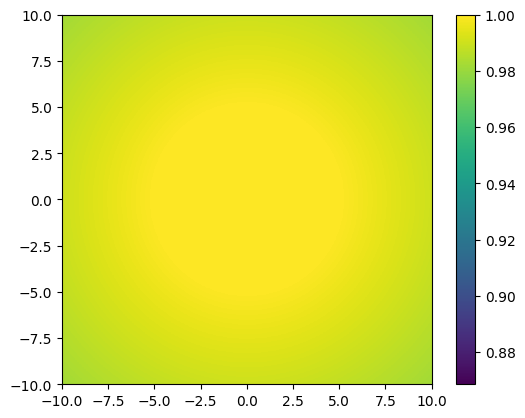

In [239]:
# plot_vector(u_out, "Unit vector out")
fac = scalar_factor(medium_in_plane)
plt.imshow(fac, extent=GLOBAL_EXTENT, origin='lower')
plt.xlim(-10,10)
plt.ylim(-10,10)
plt.colorbar()

In [ ]:
# plt.imshow(psi_out.T, extent=GLOBAL_EXTENT, origin='lower')
# plt.colorbar()

In [240]:
E_OUT = vectorized_propagate(medium_in_plane, z_out=260*uM, delta_s=epsilon)

0.00015999999999999999
160.94201094136636
161.8919534845331
162.85007097001807
163.81661909305296
164.79186679964434
165.77609726786608
166.76960898449852
167.77271692857968
168.7857538751283
169.8090718342852
170.84304364345908
171.88806473282506
172.94455508780035
174.0129614360205
175.09375969100094
176.1874576902636
177.29459827245793
178.41576274618217
179.55157481317264
180.7027050207239
181.86987583322204
183.05386743127528
184.25552437011768
185.47576325806043
186.71558165254498
187.9760684181861
189.25841585131468
190.56393395338023
191.89406733731013
193.25041538520938
194.6347564549354
196.04907717487177
197.49560819666803
198.97686823351825
200.49571885533229
202.05543343236795
203.65978495813798
205.31315947073475
207.02070481000243
208.78852914520925
210.6239712262968
212.5359767370853
214.53563643269692
216.6369798655517
218.8581902452433
221.2235493764464
223.7667301624895
226.53678226197556
229.61009336966413
233.11767519793506
237.32129079209932
242.9169040754144
254.

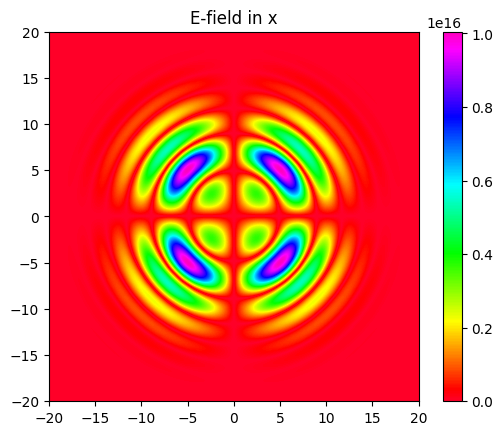

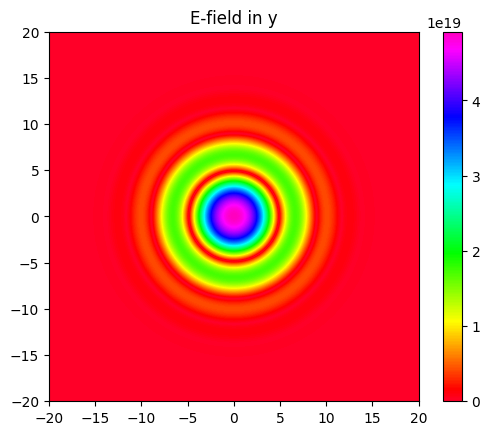

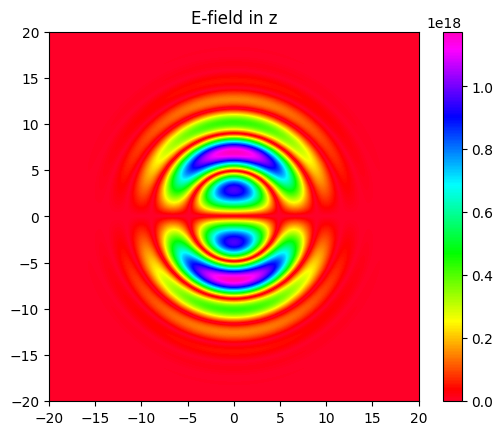

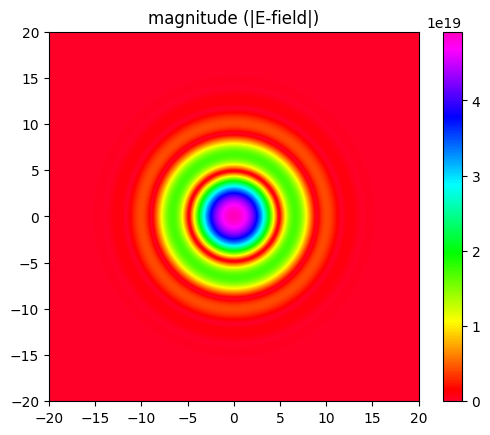

In [241]:
E_show = abs(real(E_OUT))
plot_vector(E_show, "E-field", lims=(-20, 20), cmap='gist_rainbow')